some code from : https://alancouzens.com/blog/get_data_from_fit_file.html

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from fitparse import FitFile
import glob
import os


In [ ]:
activities = pd.read_csv('/Users/emmaboudreau/Downloads/export_129463343/activities.csv')
gpx_dir = '/Users/emmaboudreau/Downloads/export_129463343/activities/'
gpx_dir = '/Users/emmaboudreau/Downloads/export_129463343/activities/'
run_gpx = glob.glob(os.path.join(gpx_dir, "*.fit.gz"))

In [87]:
activities['Distance'].sort_values()


333       0
294       0
148       0
297       0
301       0
       ... 
38     9.91
115    9.91
31     9.93
51     9.96
147    9.98
Name: Distance, Length: 497, dtype: object

In [ ]:
cols = ['Distance', 'Elapsed Time','Moving Time','Max Heart Rate','Average Heart Rate','Elevation Gain','Max Grade','Activity ID','Activity Type','Average Cadence','Average Elapsed Speed']
activities = activities[cols]
run_activities = activities[activities['Activity Type']=='Run']
# run_activities = activities[activities['Distance']=='Run']
run_ids = run_activities['Activity ID']

In [79]:
# Decompress .fit.gz to bytes in memory
def load_fit_from_gz(filepath):
    with gzip.open(filepath, 'rb') as f:
        fit_data = f.read()
    return fit_data
filepath = run_gpx[0]
fit_data = load_fit_from_gz(filepath)

# FitFile can accept bytes now
fit_file = FitFile(fit_data)

In [80]:
for record in fit_file.get_messages("record"):
    # Records can contain multiple pieces of data (ex: timestamp, latitude, longitude, etc)
    for data in record:
        # Print the name and value of the data (and the units if it has any)
        if data.units:
            print(f"{data.name}, {data.value}, {data.units}")
        else:
            print(f"{data.name} {data.value}")

cadence, 0, rpm
distance, 1.34, m
enhanced_altitude, 9.0, m
enhanced_speed, 1.344, m/s
temperature, 30, C
timestamp 2024-01-25 00:14:59
cadence, 0, rpm
distance, 1.34, m
enhanced_altitude, 9.0, m
enhanced_speed, 0.0, m/s
temperature, 30, C
timestamp 2024-01-25 00:15:00
cadence, 87, rpm
distance, 22.37, m
enhanced_altitude, 9.800000000000011, m
enhanced_speed, 2.258, m/s
temperature, 30, C
timestamp 2024-01-25 00:15:13
cadence, 87, rpm
distance, 41.98, m
enhanced_altitude, 9.0, m
enhanced_speed, 2.594, m/s
temperature, 30, C
timestamp 2024-01-25 00:15:20
cadence, 87, rpm
distance, 47.48, m
enhanced_altitude, 8.600000000000023, m
enhanced_speed, 2.781, m/s
temperature, 30, C
timestamp 2024-01-25 00:15:22
cadence, 88, rpm
distance, 53.04, m
enhanced_altitude, 8.600000000000023, m
enhanced_speed, 2.818, m/s
temperature, 30, C
timestamp 2024-01-25 00:15:24
cadence, 88, rpm
distance, 59.1, m
enhanced_altitude, 8.0, m
enhanced_speed, 3.107, m/s
temperature, 30, C
timestamp 2024-01-25 00:15:26

In [81]:
alt = []
for record in fit_file.get_messages("record"):
    # Records can contain multiple pieces of data (ex: timestamp, latitude, longitude, etc)
    for data in record:
        # Print the name and value of the data (and the units if it has any)
        if data.name == 'enhanced_altitude':
            alt.append(data.value)
print(alt)

[9.0, 9.0, 9.800000000000011, 9.0, 8.600000000000023, 8.600000000000023, 8.0, 7.800000000000011, 7.800000000000011, 8.199999999999989, 9.0, 9.800000000000011, 9.800000000000011, 9.800000000000011, 10.199999999999989, 10.399999999999977, 11.399999999999977, 11.600000000000023, 11.800000000000011, 12.0, 12.0, 12.399999999999977, 12.799999999999955, 12.799999999999955, 12.600000000000023, 12.799999999999955, 13.399999999999977, 13.399999999999977, 13.600000000000023, 13.600000000000023, 14.399999999999977, 14.200000000000045, 14.0, 14.600000000000023, 15.399999999999977, 15.600000000000023, 15.600000000000023, 15.600000000000023, 16.200000000000045, 16.0, 15.799999999999955, 16.0, 16.799999999999955, 16.799999999999955, 16.600000000000023, 16.799999999999955, 16.799999999999955, 16.799999999999955, 16.799999999999955, 17.200000000000045, 16.399999999999977, 15.600000000000023, 14.399999999999977, 13.799999999999955, 13.200000000000045, 12.399999999999977, 12.200000000000045, 11.8000000000

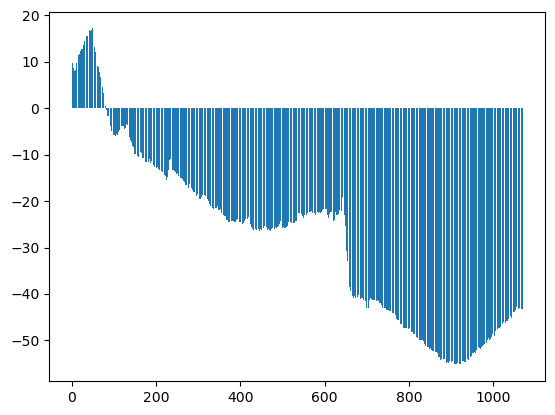

In [82]:
x = []
for i in range(len(alt)):
  x.append(i)

plt.bar(x, alt)
plt.show()